In [ ]:
import numpy as np
import torch
from Visualization import plotPredAllTime_Compare, plotPredTestTime_Compare
from joblib import load
from load_Data import return_SplitTypes

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [ ]:
data_name = 'ZB'
split_types, test_tpsS = return_SplitTypes(data_name)
models = ['scIMF', 'scNODE', 'PI-SDE', 'MIOFlow', 'PRESCIENT']

latent_type = 'PCA'
seed_num = 0


remove_recovery


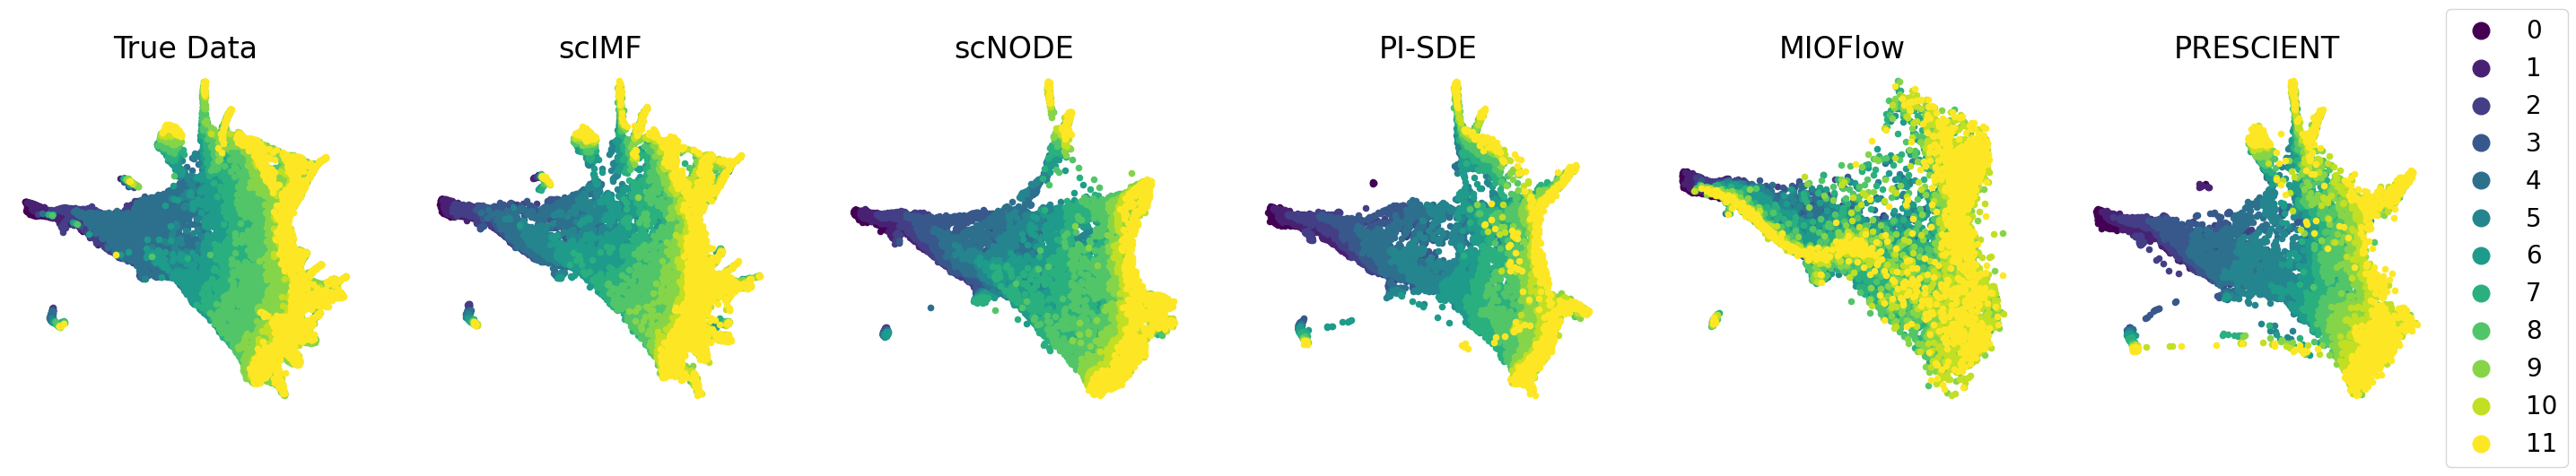

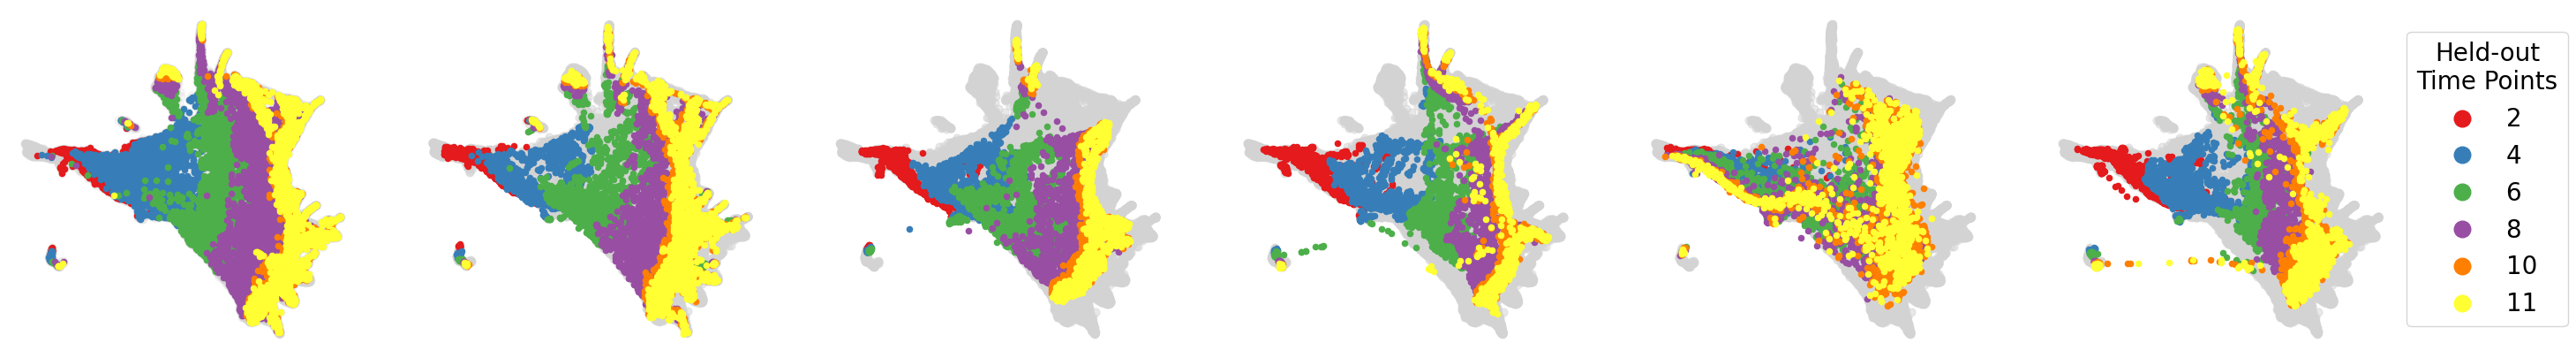

In [ ]:
split_typeS = ['remove_recovery']


for split_type in split_typeS:
    print(split_type)

    recon_trajS = []
    for model_name in models:
        if model_name == 'scIMF':
            res_filename = '../Output-{}-0.5-512/{}/{}/seed_{}/Ours/results.npy'.format(latent_type, data_name, split_type,seed_num)
        else:
            res_filename = 'Output-{}/{}/{}/seed_{}/{}/results.npy'.format(latent_type, data_name, split_type, seed_num, model_name)
        results = np.load(res_filename, allow_pickle=True).item()
        all_tps = results["tps"]['all']
        train_tps = results["tps"]['train']
        test_tps = results["tps"]['test']
        true_data = results["true_latent"]
        predict_data = results["pred_latent"] 
        recon_trajS.append( predict_data )
        
    true_data = [each.detach().numpy() if isinstance(each, torch.Tensor) else each for each in true_data]
    true_cell_tps = np.concatenate([np.repeat(t, each.shape[0]) for t, each in enumerate(true_data)])
    pred_cell_tps = np.concatenate([np.repeat(t, each.shape[0]) for t, each in enumerate(recon_trajS[0])])
    
    DR_dir = res_filename.rsplit('/',2)[0] + '/' + 'UMAP.joblib'
    loaded_model = load(DR_dir)
    umap_model = loaded_model["umap"]
    
    true_umap_traj = umap_model.transform( np.concatenate(true_data, axis=0) )
    pred_umap_trajS = []
    for recon_traj in recon_trajS:
        pred_umap_traj = umap_model.transform( np.concatenate(recon_traj, axis=0) )
        pred_umap_trajS.append(pred_umap_traj)

    plotPredAllTime_Compare(true_umap_traj, pred_umap_trajS, true_cell_tps, pred_cell_tps, models)
    plotPredTestTime_Compare(true_umap_traj, pred_umap_trajS, true_cell_tps, pred_cell_tps, test_tps, models, usetitle = False,title_size=30, ncol=1)